# Travelling Salesman Problem

In [399]:
%matplotlib inline

In [165]:
from numpy import *
from random import *
from math import exp
from copy import deepcopy
import matplotlib as matplotlib
import re

Definimos una solución como una permutación con su coste

In [166]:
class Route:
        
        def __init__(self, permutation, dist):
            self.permutation = deepcopy(permutation)
            self.dist = dist
            self.update_cost()

        """Calculates cuadratic cost"""
        def update_cost(self):
            shifted = append(self.permutation[1:], [self.permutation[0]])
            pairs = zip(self.permutation, shifted)
            self.cost = sum([self.dist[x,y] for (x,y) in pairs])
        
        def change_positions(self):
            # Intercambia dos ciudades del grafo
            i = randint(0, len(self.permutation)-1)
            j = randint(0, len(self.permutation)-1)
            self.permutation[i], self.permutation[j] = self.permutation[j], self.permutation[i]
            self.update_cost()
            
        def change_edges(self):
            # Intercambia dos aristas del grafo
            i = randint(0, len(self.permutation)-1)
            j = randint(i+1, len(self.permutation))              
            rev = self.permutation[i:j]
            rev = rev[::-1]
            self.permutation[i:j] = rev
            self.update_cost()
            

Implementación de la clase que albergará los datos del problema

In [395]:
class TSP:   
    
    #def prueba(self):
    #    return(Route(array(range(len(self.points))), self.dist))
    
    def __read (self, file):  
        f = open(file, 'r')
        match = '^[0-9].*'
        points = []
        
        for line in f:
            is_point = re.search(match, line)

            if is_point:
                x,y = map(float, line.split()[1:])
                points.append((x,y))
    
        return(points)
    
    
    def simulated_annealing(self, t_ini, max_iter, alpha):
        """Temperatura"""
        t = t_ini
        
        """Número de ciudades"""
        n = len(self.points)
        
        """Permutación"""
        permutation = array(range(n))
        shuffle(permutation)
        solution = Route(permutation, self.dist)
        best_solution = Route(permutation, self.dist)
        
        """Variables que controlan las iteraciones"""
        improvement = True
        i=0
        
        while(i<max_iter):
            candidate = deepcopy(solution)
            candidate.change_edges()
            diff_cost = candidate.cost - solution.cost
            
            if (diff_cost < 0 or random() < exp(-diff_cost*1.0/t)):
                solution = deepcopy(candidate)
        
                if (solution.cost < best_solution.cost):
                    best_solution = deepcopy(solution)
            
            """Esquema de enfriamiento"""
            t = alpha*t
            
            #if (i%100==0):
            #    print(t)
            i+=1
        
        return best_solution
    
    def tabu_search(self):
        print ("prueba")
        
    def print_solution(self, solution):
        p_x = [ self.points[i][0] for i in solution.permutation ]
        p_y = [ self.points[i][1] for i in solution.permutation ]
        p_x = append(p_x, p_x[0])
        p_y = append(p_y, p_y[0])
        tol_x = 0.05 * mean(p_x)
        tol_y = 0.05 * mean(p_y)
        
        matplotlib.rcParams.update({'font.size': 18, 'lines.linewidth':3})
        matplotlib.pyplot.figure(figsize=(15,10))
        matplotlib.pyplot.xlim(min(p_x) - tol_x, max(p_x) + tol_x)
        matplotlib.pyplot.ylim(min(p_y) - tol_y, max(p_y) + tol_y)
        matplotlib.pyplot.plot(p_x, p_y, marker='o', color='red', markersize=7)
    
    def __init__(self, file):
        self.points = array(self.__read(file))
        self.dist = sqrt(
            [
                [dot(subtract(x,y),subtract(x,y)) for x in self.points] 
                for y in self.points
            ])


In [404]:
files = ['berlin52.tsp', 'ch150.tsp', 'd198.tsp', 'eil101.tsp']

problems = {}
sa_solutions = {}
ts_solutions = {}
best_solutions = {'berlin52': 7542,
                  'ch150':    6528,
                  'd198':     15780,
                  'eil101':   629}

In [409]:
seed(12345678)

for f in files:
    name = f[:-4]
    problems[name] = TSP(f)
    size = len(problems[name].points)
    n_iter = 10000
    alpha = 0.95
    sa_solutions[name] = problems[name].simulated_annealing(size*1e3, n_iter, alpha) 

eil101
	 SA: 769.082713018
	 Best: 629
berlin52
	 SA: 7862.08533127
	 Best: 7542
ch150
	 SA: 8971.29383709
	 Best: 6528
d198
	 SA: 31217.2274141
	 Best: 15780


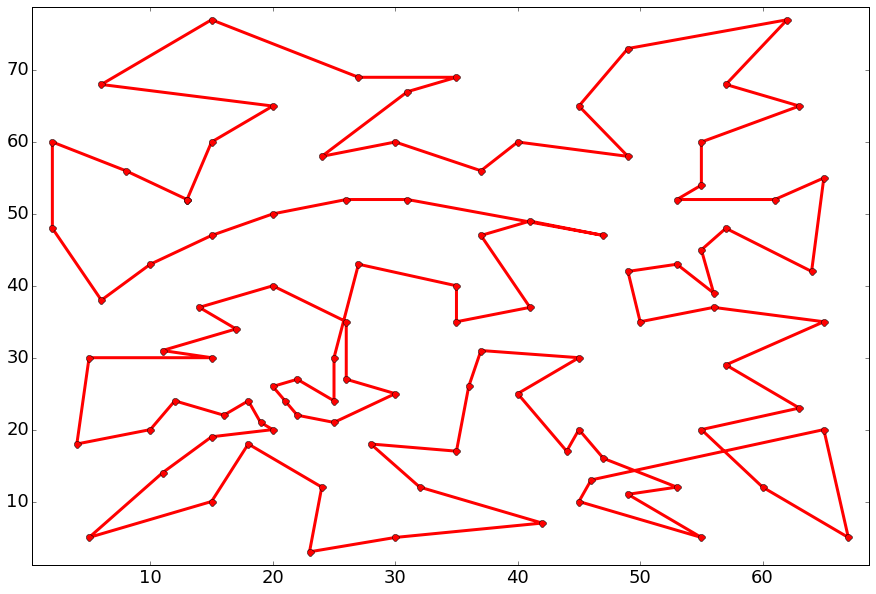

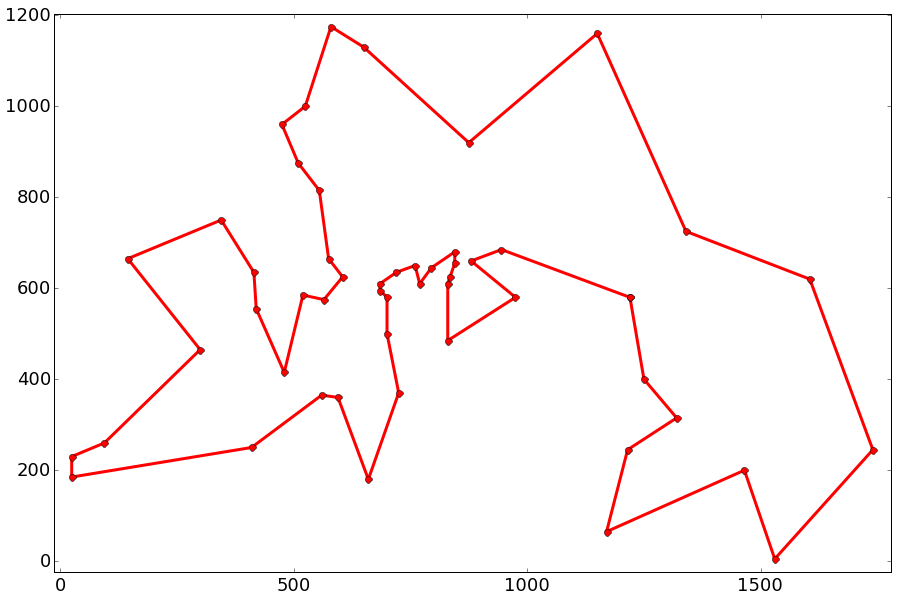

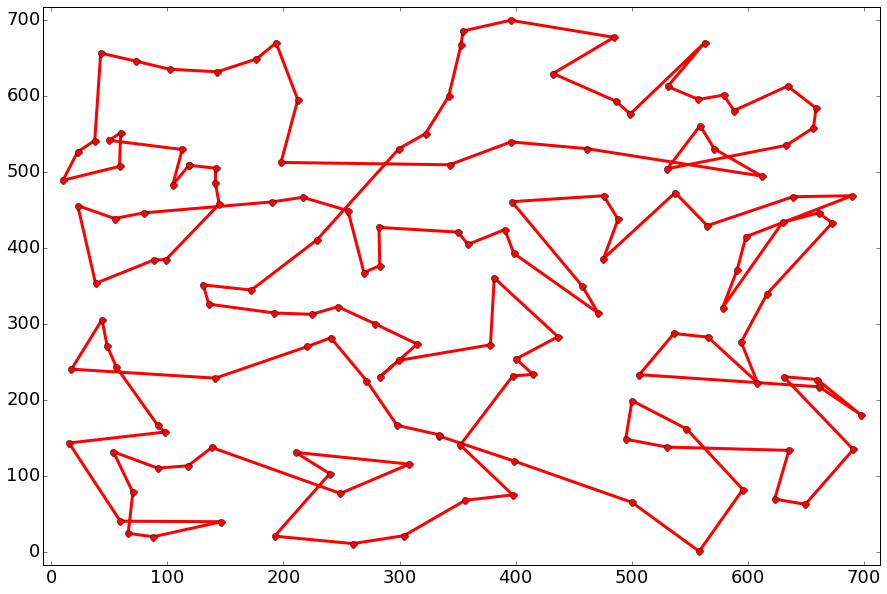

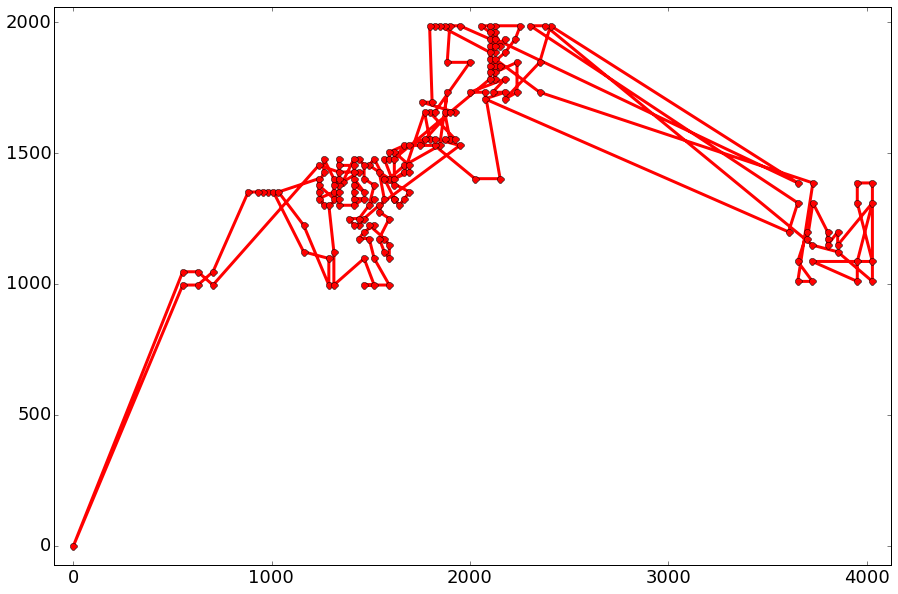

In [410]:
for name in problems:
    print (name 
           + '\n\t SA: '   + str(sa_solutions[name].cost)
           + '\n\t Best: ' + str(best_solutions[name]))
    problems[name].print_solution(sa_solutions[name])